In [36]:
from tensorflow.keras.layers import Dense, Input, LSTM

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

import numpy as np

import matplotlib.pyplot as plt



# 1차원 배열의 시계열 데이터로 학습용 배치 파일을 만든다. 입력값 = 1개, 출력값 = 1개
# return : xBatch - RNN 입력
#          yBatch - RNN 출력

#
# step = 3 인 경우의 예시
# xData = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
# 

# xBatch, yBatch는 3차원 텐서로 만든다. (-1, step=3, 1)

# xBatch = [[1]] [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] --> 7 x 3 x 1
#          [[2]] [[3]] [[4]] [[5]] [[6]] [[7]] [[8]]
#          [[3]] [[4]] [[5]] [[6]] [[7]] [[8]] [[9]]

#
# yBatch =  [4]   [5]   [6]   [7]   [8]   [9]   [10] --> 7 x 1
#
# ex : xBatch[0] = [[3],[4],[5]],   yBatch[0] = [6]
#      3-step 짜리 LSTM에 3,4,5가 입력되면 6이 출력되도록 학습한다.

def createTrainData(xData, step):
    m = np.arange(len(xData) - step)   

    x, y = [], []
    for i in m:
        a = xData[i:(i+step)]
        x.append(a)
    xBatch = np.reshape(np.array(x), (len(m), step, 1))    

    for i in m+1:
        a = xData[i:(i+step)]
        y.append(a[-1])
    yBatch = np.reshape(np.array(y), (len(m), 1))    

    return xBatch, yBatch


# 시계열 데이터 (noisy sin)
data = np.sin(2 * np.pi * 0.03 * np.arange(1001)) + np.random.random(1001) # trend & noisy sine
nInput = 1
nOutput = 1
nStep = 20
nHidden = 50

# 학습 데이터를 생성한다.
x, y = createTrainData(data, nStep)

In [38]:
data.shape

(1001,)

In [23]:
x.shape

(981, 20, 1)

In [24]:
y.shape

(981, 1)

In [40]:
y

array([[ 2.13730273e-01],
       [ 1.43419050e-01],
       [-2.50116788e-01],
       [-2.16506339e-01],
       [-1.27773064e-01],
       [-5.83420414e-02],
       [-4.17612274e-01],
       [-4.61840967e-01],
       [-5.92788341e-01],
       [-1.44983503e-01],
       [-1.88189796e-01],
       [-2.28337562e-01],
       [ 2.53455759e-01],
       [ 5.16477073e-02],
       [ 4.03688013e-01],
       [ 1.21246277e+00],
       [ 8.23400714e-01],
       [ 1.41456179e+00],
       [ 8.66158297e-01],
       [ 9.15797289e-01],
       [ 1.93438165e+00],
       [ 1.09103423e+00],
       [ 1.95055109e+00],
       [ 1.36609502e+00],
       [ 9.79219032e-01],
       [ 1.25681705e+00],
       [ 9.45866256e-01],
       [ 1.36337880e+00],
       [ 4.62300421e-01],
       [ 1.13002809e+00],
       [ 8.94843593e-02],
       [ 5.93473381e-01],
       [ 5.12566956e-01],
       [-4.00868881e-01],
       [-1.09979550e-01],
       [-3.83452909e-01],
       [-3.30231624e-01],
       [-9.14795102e-01],
       [-5.0

In [18]:
np.sin(2 * np.pi * 0.03 * np.arange(1001)) 

array([ 0.00000000e+00,  1.87381315e-01,  3.68124553e-01, ...,
       -3.68124553e-01, -1.87381315e-01, -2.15587355e-14])

In [19]:
np.random.random(1001)

array([0.73289611, 0.54253016, 0.63877482, ..., 0.22892047, 0.16429638,
       0.78729482])

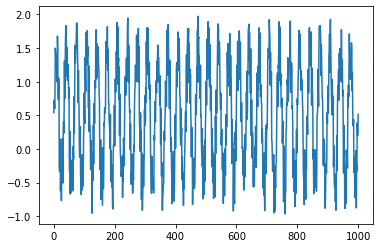

In [8]:
np.sin(2 * np.pi * 0.03 * np.arange(1001)) + np.random.random(1001) 

array([0.89664377, 0.29023285, 1.12494242, ..., 0.43994902, 0.43745881,
       0.79694098])

In [15]:
nStep

20

In [17]:
len(data)

1001

In [20]:
# LSTM 모델을 생성한다.

xInput = Input(batch_shape=(None, nStep, 1)) #None,20,1
xLstm = LSTM(nHidden)(xInput)
xOutput = Dense(nOutput)(xLstm)
model = Model(xInput, xOutput)
model.compile(loss='mse', optimizer=Adam(lr=0.01))

# 학습한다
h = model.fit(x, y, epochs=100, batch_size=100, shuffle=True)

Epoch 1/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2524
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.1085
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1020
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0986
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0972
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0959
Epoch 7/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0947
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1004
Epoch 9/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0970
Epoch 10/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0992
Epoch 11/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0962
Epoch 12/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0938
Epoch 13/100
10/10 [=================

In [29]:
  nFuture = 20
if len(data) > 100:

    lastData = np.copy(data[-100:])  # 원 데이터의 마지막 100개만 그려본다

else:

    lastData = np.copy(data)    

dx = np.copy(lastData)

In [35]:
dx

array([ 0.96493645,  0.43873141,  1.19146539,  1.47662934,  1.04960028,
        1.19126755,  1.52296047,  1.95481798,  1.64877389,  1.18113205,
        0.95417192,  1.70430853,  1.2229171 ,  0.65561553,  0.86632626,
        1.00451346,  0.71966936,  0.49283272, -0.38386832,  0.29201178,
       -0.38722877,  0.12130242, -0.65468324, -0.19097312, -0.86161691,
       -0.63734319, -0.21297785, -0.30347836,  0.19561301, -0.04561837,
        0.17980385, -0.03267569,  0.36837391,  0.88231294,  0.96674082,
        0.82713449,  0.78411494,  1.71536462,  1.23620742,  1.05947013,
        1.30325527,  1.96460657,  0.97175136,  1.56305035,  1.51486832,
        1.38856043,  0.98577112,  0.78404666,  0.23549845,  0.81139238,
        0.42252754,  0.23246204,  0.238498  , -0.2300377 , -0.78682556,
       -0.25064819, -0.06088108, -0.02811676, -0.82124257, -0.84939818,
        0.11336404, -0.23654807, -0.14737223,  0.37150464,  0.55041783,
        0.80770399,  0.56638037,  0.38313135,  1.10956665,  1.21

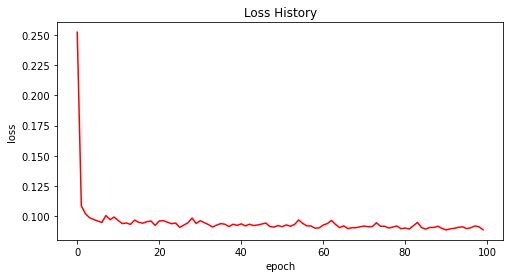

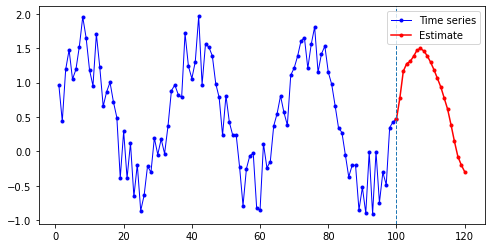

In [28]:


# 향후 20 기간 데이터를 예측한다. 향후 1 기간을 예측하고, 예측값을 다시 입력하여 2 기간을 예측한다.
# 이런 방식으로 20 기간까지 예측한다.



estimate = [dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다

    px = dx[-nStep:].reshape(1, nStep, 1)   
    # 다음 값을 예측한다.
    yHat = model.predict(px)[0][0]
      
    # 예측값을 저장해 둔다
    estimate.append(yHat)    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다
    dx = np.insert(dx, len(dx), yHat)



# Loss history를 그린다
plt.figure(figsize=(8, 4))

plt.plot(h.history['loss'], color='red')

plt.title("Loss History")

plt.xlabel("epoch")

plt.ylabel("loss")

plt.show()



# 원 시계열과 예측된 시계열을 그린다

ax1 = np.arange(1, len(lastData) + 1)

ax2 = np.arange(len(lastData), len(lastData) + len(estimate))

plt.figure(figsize=(8, 4))

plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimate')

plt.axvline(x=ax1[-1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()